<div>
<img src="https://www.nebrija.com/images/logos/logotipo-universidad-nebrija.jpg" width="200">
</div>

**ALGORITMOS** -
Prof: Carmen Pellicer Lostao

# Quantum Random Bit Generator (QRBG) de dos secuencias binarias perfectamente aleatorias

Necesitamos un generador de numeros aleatorios que produzca dos secuencias aleatorias exactamente iguales para dos personas Alice y Bob, con igual probabilidad de obtener 0 o 1 (al 50%)


```
ALICE -------- BOB
0  --------  0
0  --------  0
1  --------  1
1  --------  1
0  --------  0
1  --------  1
1  --------  1
.
.
.
```

Para ello debes de crear un circuito cuantico de dos qbits que produzca bits clasicos en cada medida para Alice y Bob.

Ejecuta el circuito en un simulador cuantico y obten:

* los primeros 100 bits de ambas personas
* el histograma de bits medidos en la ejecucion que demuestra que se generan 0 y 1 para Alice y Bob entrelazados y al 50%






PASO 1 - Creamos el circuito desde el Composer

/home/codespace/.python/current/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


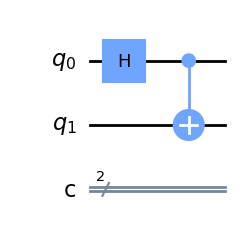

In [1]:
# Importamos las librerías necesarias
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

# Creamos el circuito
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

# Realizamos el entrelazamiento
circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])

# Lo dibujamos
circuit.draw("mpl")

PASO 2 - Lo ejecutamos en el simulador

In [2]:
# Librerías para la ejecución
from qiskit import Aer, transpile

# Ponemos las medidas
circuit.measure(qreg_q,creg_c)

# Ejecutamos el circuito
simulador = Aer.get_backend("aer_simulator")
circuito_transp = transpile(circuit,simulador)
resultado = simulador.run(circuito_transp,shots = 1000,memory=True).result() # Queremos que se recuerde cada resultado de la medición
# Ponemos 1000 shots para que en el histograma se vea mejor el que se trata de un 50%

PASO 3 - Vemos los resultados

In [3]:
# Importamos plot_histogram
from qiskit.visualization import plot_histogram

# Vemos los resultados (que son los 100 primeros), de acuerdo al formato exigido
def imprime_counts(resultados):
    print("\nALICE -------- BOB")
    for ind in resultados.get_memory()[:100]:
        print(f"{ind[1]} -------- {ind[0]}")

imprime_counts(resultado)


ALICE -------- BOB
0 -------- 0
0 -------- 0
1 -------- 1
1 -------- 1
1 -------- 1
0 -------- 0
1 -------- 1
0 -------- 0
1 -------- 1
1 -------- 1
1 -------- 1
0 -------- 0
0 -------- 0
0 -------- 0
0 -------- 0
0 -------- 0
0 -------- 0
1 -------- 1
0 -------- 0
1 -------- 1
1 -------- 1
1 -------- 1
0 -------- 0
1 -------- 1
1 -------- 1
0 -------- 0
0 -------- 0
1 -------- 1
0 -------- 0
0 -------- 0
1 -------- 1
0 -------- 0
1 -------- 1
1 -------- 1
1 -------- 1
1 -------- 1
1 -------- 1
1 -------- 1
1 -------- 1
0 -------- 0
0 -------- 0
1 -------- 1
1 -------- 1
1 -------- 1
1 -------- 1
1 -------- 1
0 -------- 0
1 -------- 1
1 -------- 1
1 -------- 1
1 -------- 1
1 -------- 1
1 -------- 1
0 -------- 0
0 -------- 0
1 -------- 1
1 -------- 1
1 -------- 1
1 -------- 1
0 -------- 0
1 -------- 1
1 -------- 1
0 -------- 0
0 -------- 0
0 -------- 0
0 -------- 0
1 -------- 1
1 -------- 1
1 -------- 1
1 -------- 1
0 -------- 0
0 -------- 0
1 -------- 1
0 -------- 0
0 -------- 0
0 ---

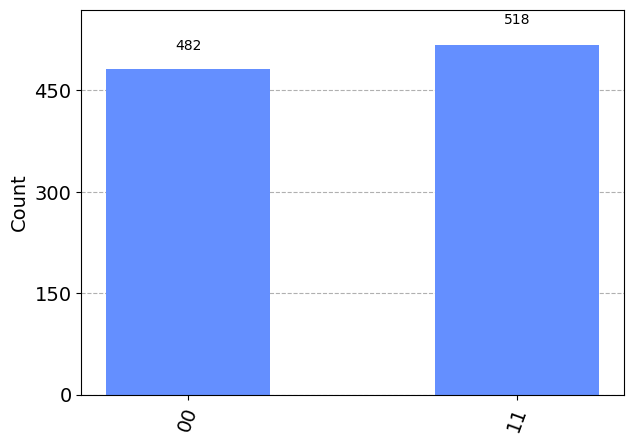

In [4]:
# Mostramos el histograma
plot_histogram(resultado.get_counts())

# Quantum Random Bit Generator (QRBG) de dos secuencias binarias condicionadas

Necesitamos un generador de numeros aleatorios que produzca dos secuencias aleatorias exactamente para dos personas Alice y Bob, con probabilidades diferentes y entrelazadas:
- Alice obtine una secuencia con igual probabilidad de obtener 0 o 1 (al 50%)
- si Alice obtiene un 0, Bob obtiene una probabilidad de 0 y 1 al 85% y 15% respectivamente.
- si Alice ontiene un 1, Bob obtiene una probabilidad de 1 y 0 al 85% y 15% respectivamente.


```
ALICE -------- BOB
0  --------  0
0  --------  0
1  --------  0
1  --------  1
1  --------  0
0  --------  1
1  --------  1
1  --------  1
1  --------  1
0  --------  0
1  --------  1
0  --------  0
1  --------  1
1  --------  1
1  --------  1
.
.
.
```

Para ello debes de crear un circuito cuantico de dos qbits que produzca bits clasicos en cada medida para Alice y Bob.

Ejecuta el circuito en un simulador cuantico y obten:

* los primeros 100 bits de ambas personas
* el histograma de bits medidos en la ejecucion

PASO 1 - Creamos el circuito desde el Composer

/home/codespace/.python/current/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


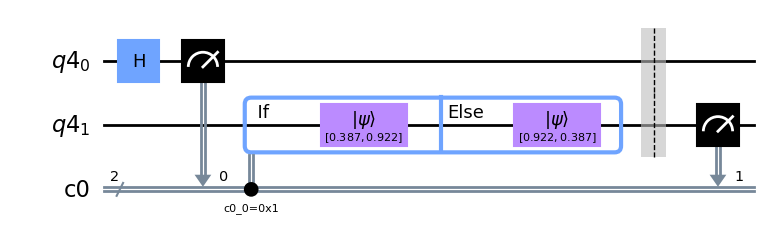

In [5]:
import numpy as np

# Creamos el circuito
qreg = QuantumRegister(2)
creg = ClassicalRegister(2)
circuit = QuantumCircuit(qreg,creg)

# Alice tiene un 50% de probabilidad de obtener 0 o 1
circuit.h(0)
circuit.measure(qreg[0],creg[0])

# Dependiendo del resultado de la medición se inicializa el qubit de Bob a uno concreto
with circuit.if_test((creg[0], 1)) as else_:
    circuit.initialize([np.sqrt(0.15),np.sqrt(0.85)],qubits=[1]) # Alice mide 1. Entonces, Bob tiene un 85% de probabilidad de obtener 1 y un 15% de obtener 0
with else_:
    circuit.initialize([np.sqrt(0.85),np.sqrt(0.15)],qubits=[1]) # Alice mide 0. Entonces, Bob tiene un 85% de probabilidad de obtener 0 y un 15% de obtener 1

circuit.barrier()
circuit.measure(qreg[1],creg[1])

# Dibujamos el circuito
circuit.draw("mpl")

PASO 2 - Lo ejecutamos en el simulador

In [6]:
# Ejecutamos el circuito
simulador = Aer.get_backend("aer_simulator")
circuito_transp = transpile(circuit,simulador)
resultado = simulador.run(circuito_transp,shots = 1000,memory=True).result() # Queremos que se recuerde cada resultado de la medición

PASO 3 - Vemos los resultados

In [7]:
# Resultados
imprime_counts(resultado)


ALICE -------- BOB
0 -------- 0
1 -------- 1
0 -------- 0
1 -------- 1
1 -------- 1
0 -------- 0
0 -------- 0
1 -------- 0
0 -------- 0
0 -------- 0
0 -------- 0
0 -------- 0
0 -------- 1
0 -------- 0
1 -------- 1
1 -------- 0
1 -------- 1
0 -------- 0
0 -------- 1
1 -------- 1
0 -------- 0
1 -------- 1
0 -------- 0
1 -------- 0
1 -------- 1
0 -------- 0
0 -------- 0
0 -------- 0
1 -------- 1
1 -------- 1
0 -------- 1
0 -------- 0
1 -------- 1
1 -------- 1
0 -------- 0
1 -------- 1
0 -------- 0
1 -------- 0
1 -------- 1
0 -------- 0
1 -------- 1
1 -------- 0
0 -------- 0
1 -------- 1
0 -------- 0
1 -------- 1
0 -------- 1
0 -------- 0
0 -------- 0
1 -------- 1
1 -------- 1
1 -------- 1
0 -------- 0
0 -------- 0
0 -------- 1
1 -------- 0
1 -------- 1
0 -------- 0
0 -------- 0
1 -------- 1
1 -------- 1
1 -------- 1
0 -------- 0
0 -------- 0
1 -------- 1
1 -------- 1
1 -------- 1
0 -------- 0
0 -------- 0
1 -------- 1
1 -------- 1
1 -------- 1
1 -------- 0
1 -------- 1
0 -------- 0
0 ---

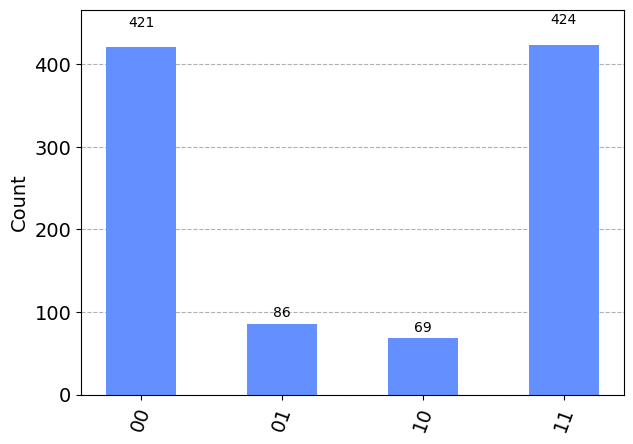

In [8]:
# Histograma
plot_histogram(resultado.get_counts())